In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\dsbda_mini\uber.csv")

In [3]:
df.dropna(inplace=True)
df = df[(df['fare_amount'] > 0) & (df['passenger_count'] > 0)]

In [4]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = df['fare_amount']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 10.14071794317557


In [9]:
import os

# Create the directory if it doesn't exist
model_dir = r"C:\Users\admin\OneDrive\Desktop\dsbda_mini\model"
os.makedirs(model_dir, exist_ok=True)

# Save model
joblib.dump(model, os.path.join(model_dir, "uber_model.pkl"))


['C:\\Users\\admin\\OneDrive\\Desktop\\dsbda_mini\\model\\uber_model.pkl']

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


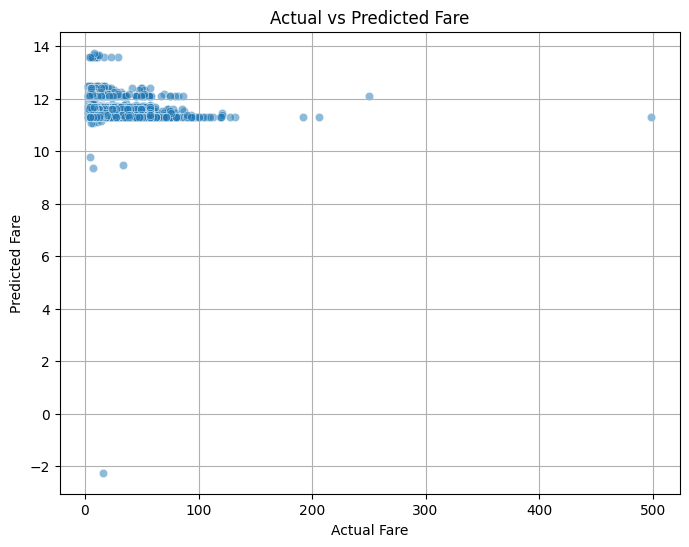

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare")
plt.grid(True)
plt.show()

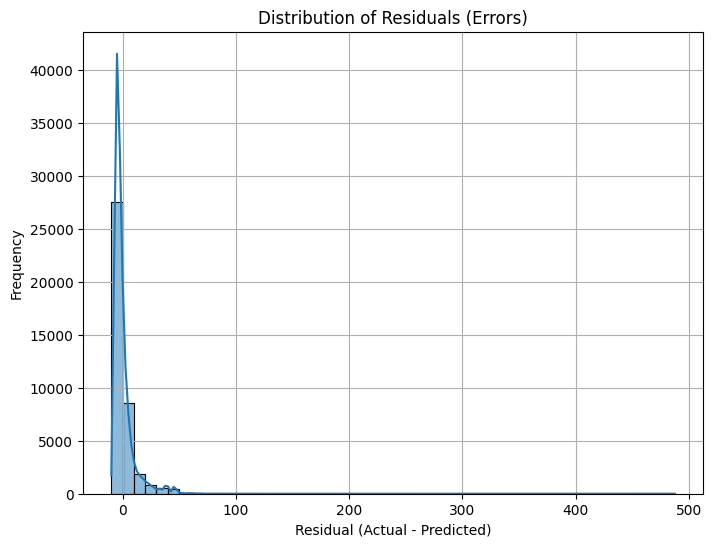

In [15]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()